# Intergal using Line Equation from Stock Histocial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sympy import *

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-04-01'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
2020-01-01 00:00:00+05:30    12182.500000
2020-01-02 00:00:00+05:30    12282.200195
2020-01-03 00:00:00+05:30    12226.650391
2020-01-06 00:00:00+05:30    11993.049805
2020-01-07 00:00:00+05:30    12052.950195
Name: Adj Close, dtype: float64

In [3]:
df = dataset.reset_index()

In [4]:
df.head()

,Date,Adj Close
0,2020-01-01 00:00:00+05:30,12182.500000
1,2020-01-02 00:00:00+05:30,12282.200195
2,2020-01-03 00:00:00+05:30,12226.650391
3,2020-01-06 00:00:00+05:30,11993.049805
4,2020-01-07 00:00:00+05:30,12052.950195


In [5]:
df.tail()

,Date,Adj Close
803,2023-03-24 00:00:00+05:30,16945.050781
804,2023-03-27 00:00:00+05:30,16985.699219
805,2023-03-28 00:00:00+05:30,16951.699219
806,2023-03-29 00:00:00+05:30,17080.699219
807,2023-03-31 00:00:00+05:30,17359.750000


In [6]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [7]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,12182.500000
1,12282.200195
2,12226.650391
3,11993.049805
4,12052.950195
...,...
803,16945.050781
804,16985.699219
805,16951.699219
806,17080.699219


In [8]:
data = data.reset_index()

In [9]:
data.values

array([[0.00000000e+00, 1.21825000e+04],
       [1.00000000e+00, 1.22822002e+04],
       [2.00000000e+00, 1.22266504e+04],
       ...,
       [8.05000000e+02, 1.69516992e+04],
       [8.06000000e+02, 1.70806992e+04],
       [8.07000000e+02, 1.73597500e+04]])

In [10]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [11]:
points = data.values

In [12]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [13]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 10.947874040857087x + 10599.388695733607


In [14]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 10.947874040857087x + 10599.388695733607


In [15]:
equation = print("{m}*x + {c}".format(m=m,c=c))

10.947874040857087*x + 10599.388695733607


In [16]:
x = Symbol('x')

In [17]:
integrate(0.021718614923358828*x+9.372574584656501, x)

0.0108593074616794*x**2 + 9.3725745846565*x

In [18]:
integrate(0.0108593074616794*x**2 + 9.3725745846565 * x, x)

0.00361976915389313*x**3 + 4.68628729232825*x**2

# Univariate roots and fixed points

In [19]:
def f(x):
    return 0.00361976915389313*x**3 + 4.68628729232825 * x**2

In [20]:
x = df['Adj Close']

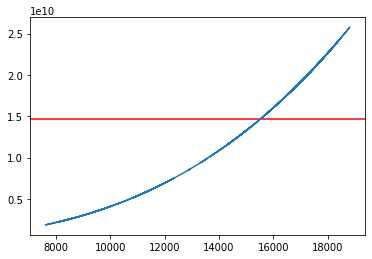

In [21]:
plt.axhline((f(x)).mean(), c='red')
plt.plot(x, f(x))